In [1]:
#!kaggle competitions download -c house-prices-advanced-regression-techniques

In [2]:
#!unzip ./house-prices-advanced-regression-techniques.zip -d data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder,  MinMaxScaler, Normalizer
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from tensorflow import keras
import tensorflow as tf
import numpy as np

2021-10-21 13:48:56.334009: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-21 13:48:56.334040: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Global config

In [4]:
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

## Analyzing Data

In [5]:
df = pd.read_csv("./train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Check for empty values

In [7]:
df.isna().sum().loc[lambda x: x>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

## Fill categorical nan values to "None"

In [8]:
dropped_na_lot_frontage_df = df.dropna(subset=["LotFrontage", "MasVnrArea", "GarageYrBlt"]) 
filledDf = dropped_na_lot_frontage_df.fillna("None")
filledDf = filledDf.drop(labels="Id", axis="columns")
filledDf.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [9]:
filledDf.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

## Select all text values (all text values are categorical)

In [10]:
filledDf.select_dtypes(include=["object"])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1456,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,None,MnPrv,None,WD,Normal
1457,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,None,GdPrv,Shed,WD,Normal
1458,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,None,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal


In [11]:
filledDf.isna().sum().loc[lambda x: x>0].sort_values(ascending=False) #Rechecking

Series([], dtype: int64)

## Checking for caegorical columns how they affect Sale price of house

/tmp/ipykernel_136631/2532098131.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7,7))


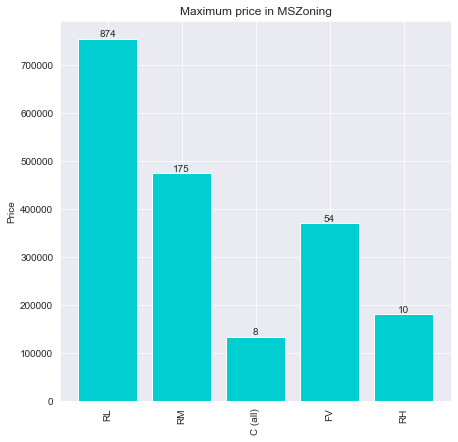

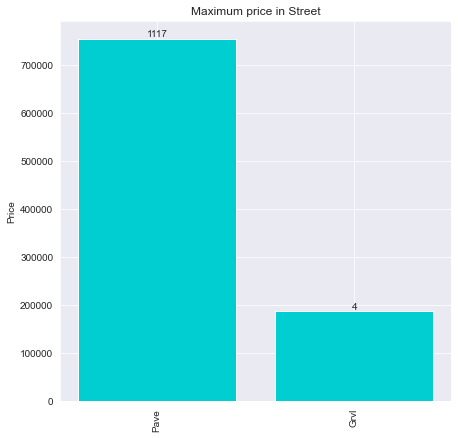

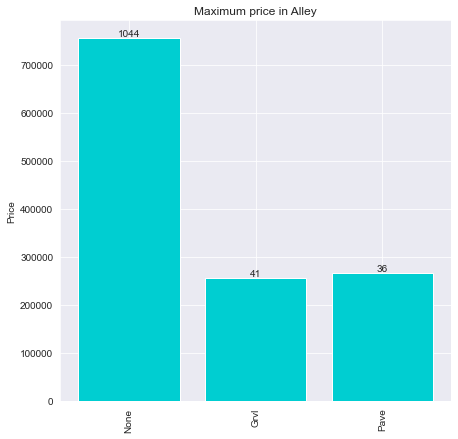

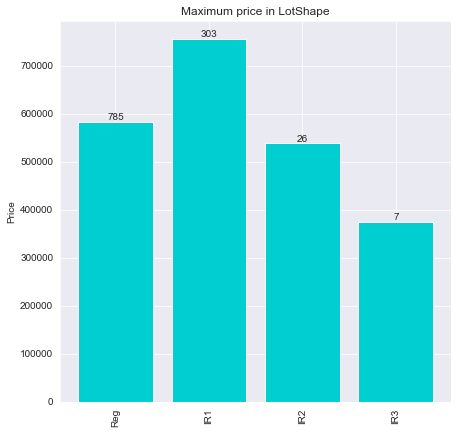

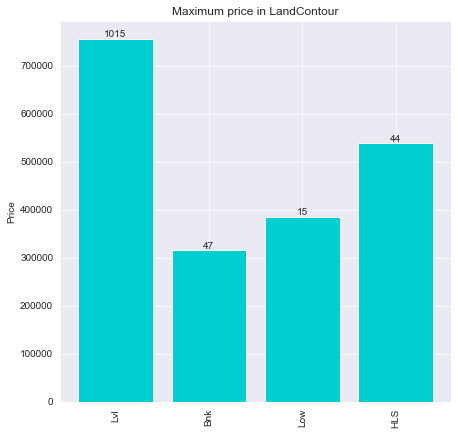

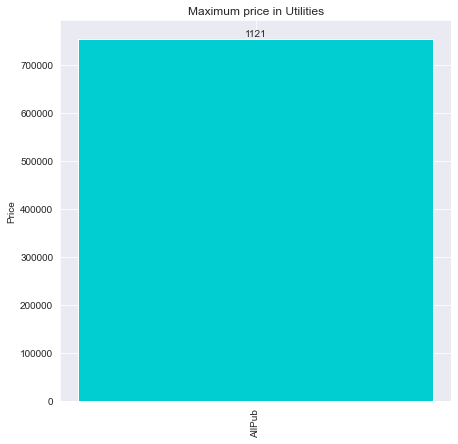

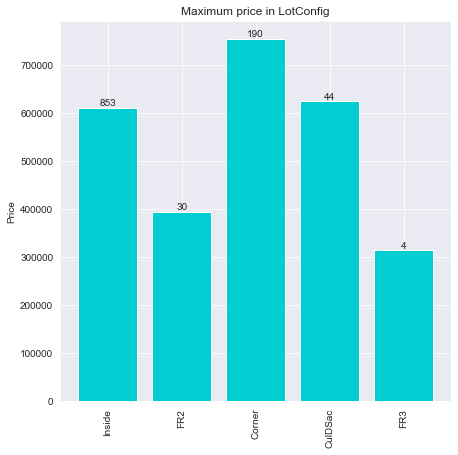

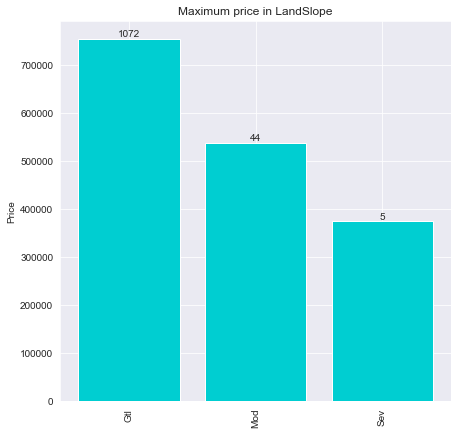

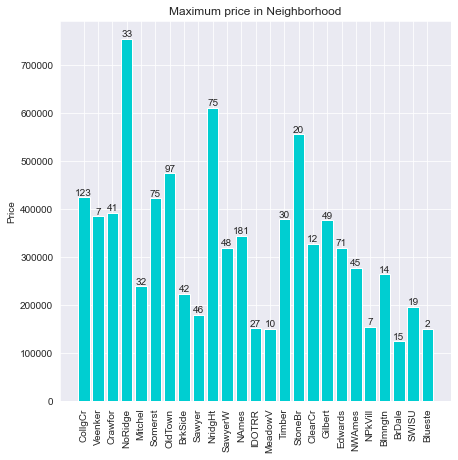

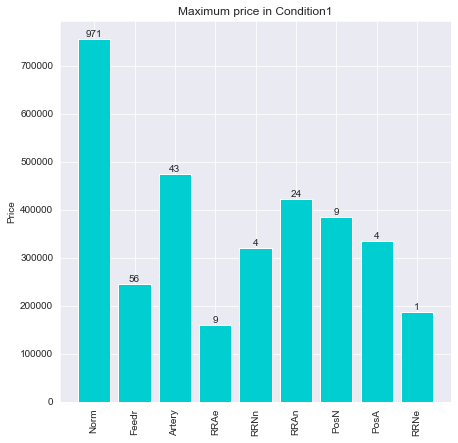

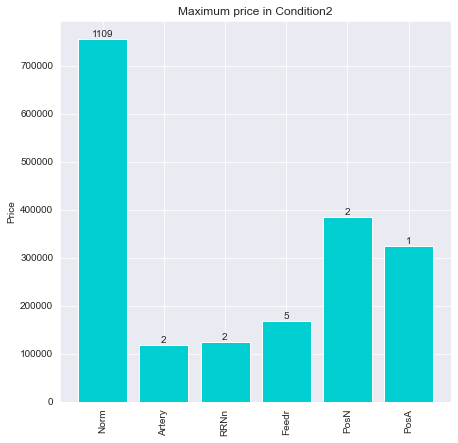

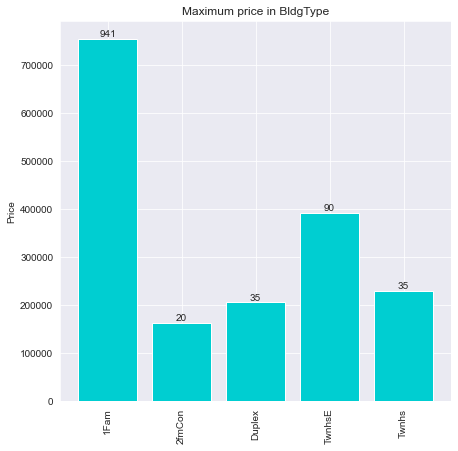

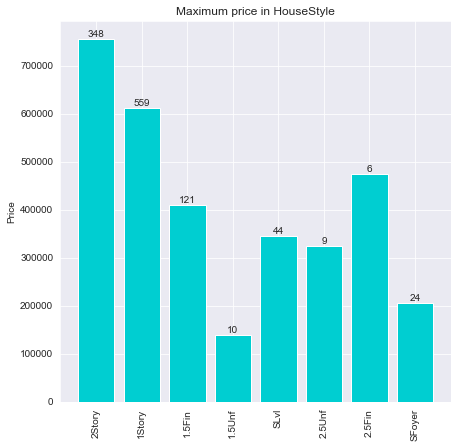

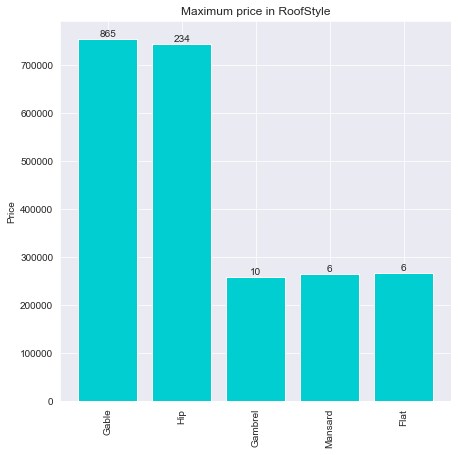

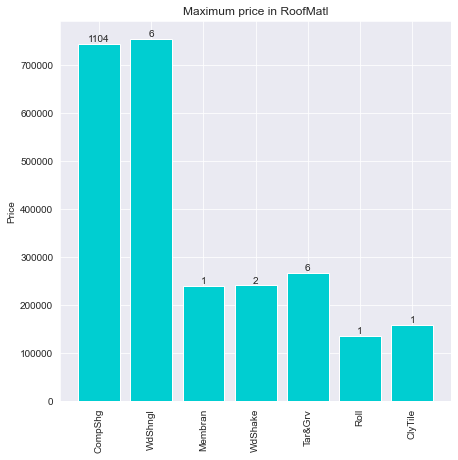

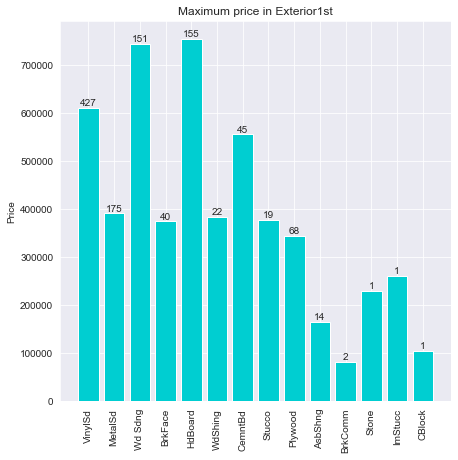

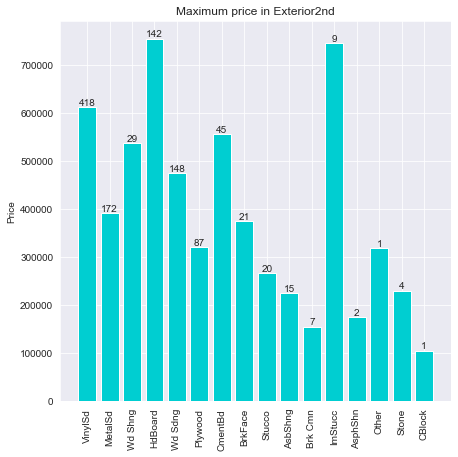

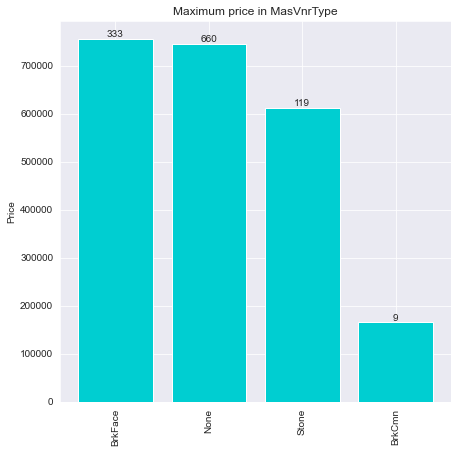

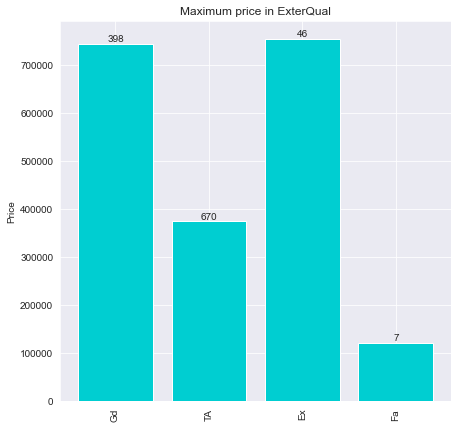

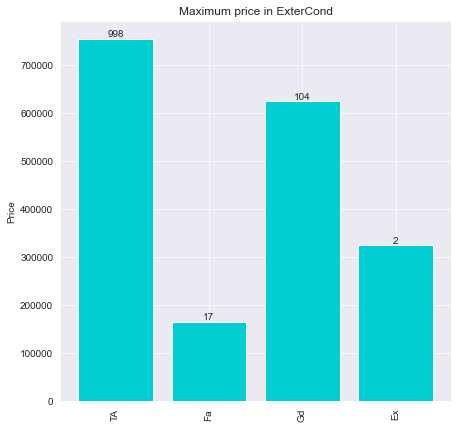

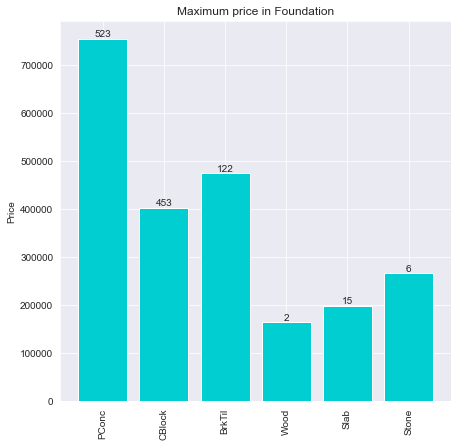

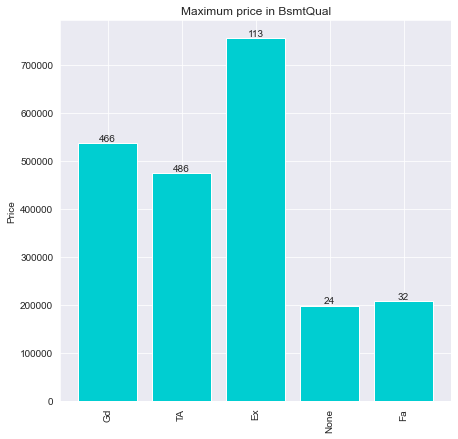

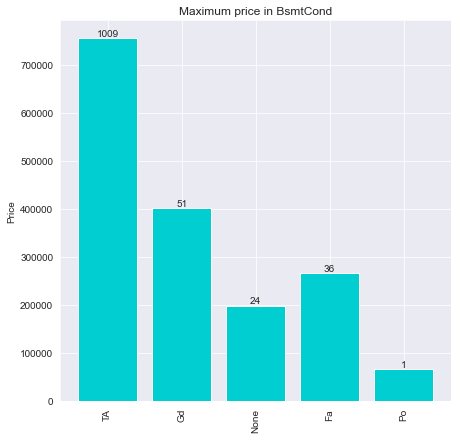

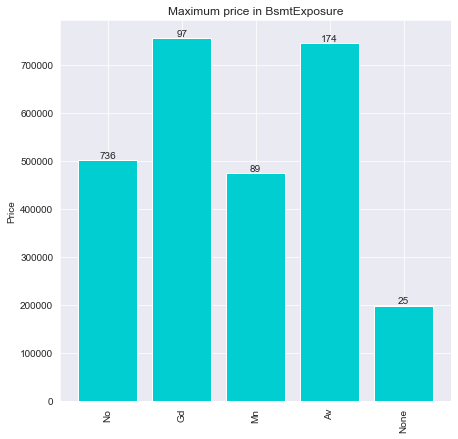

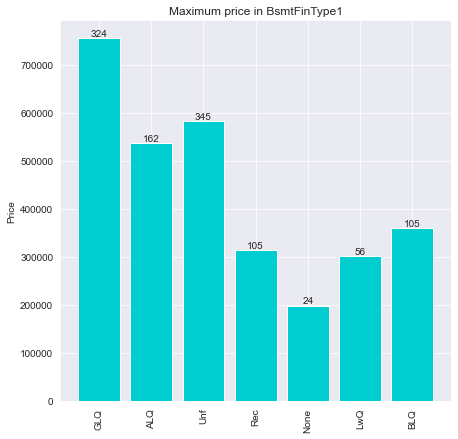

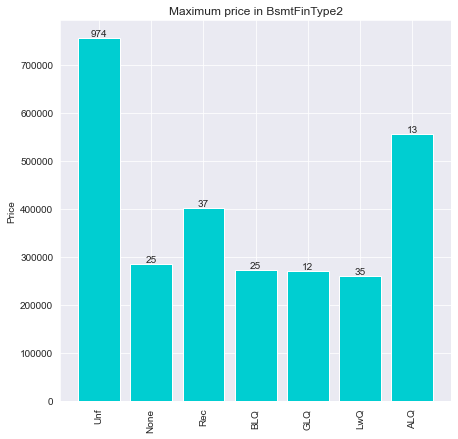

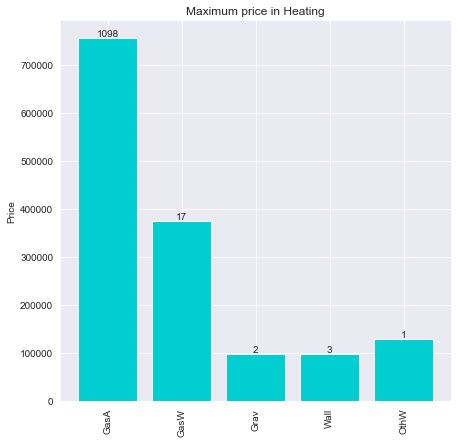

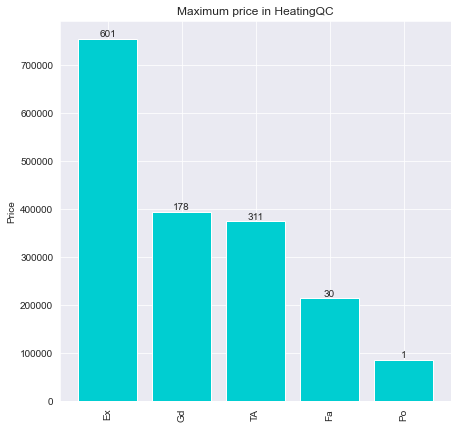

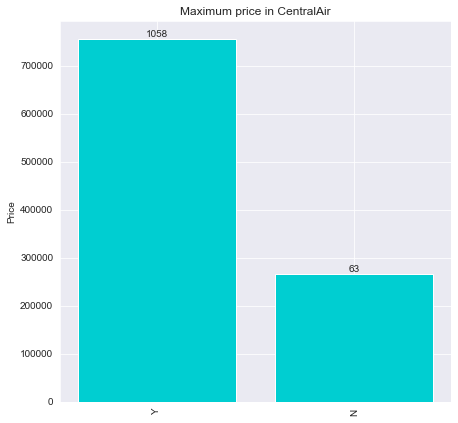

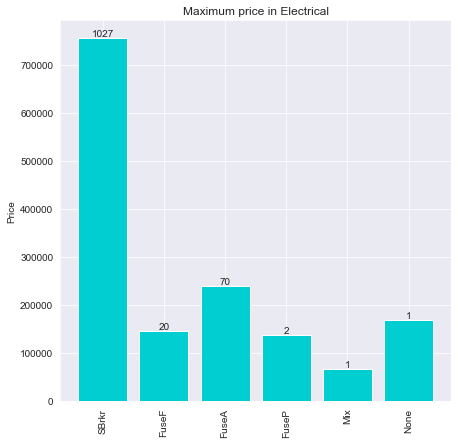

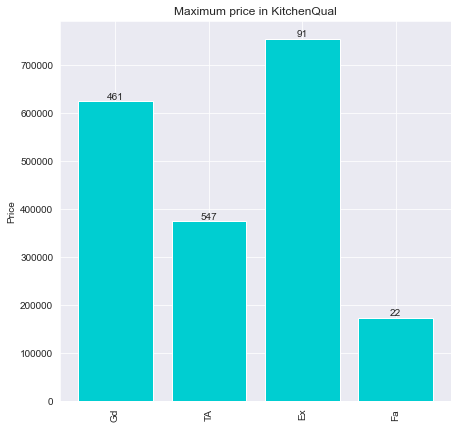

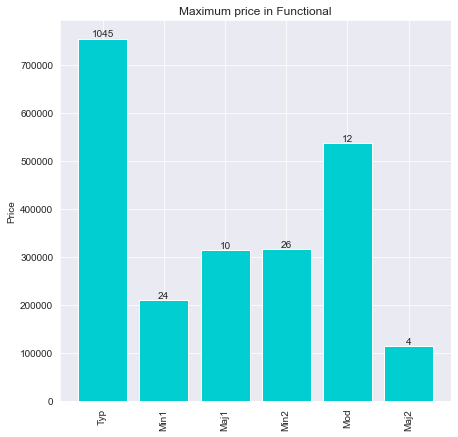

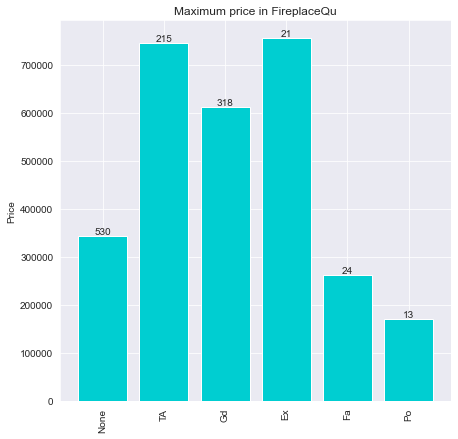

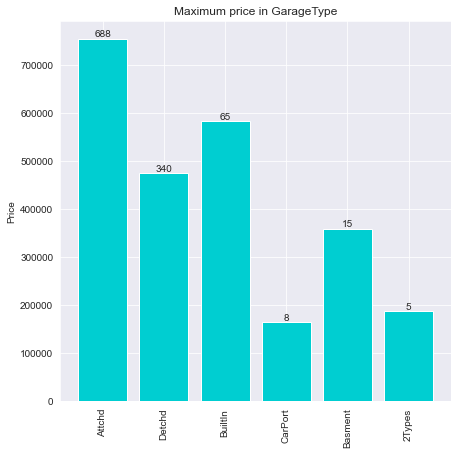

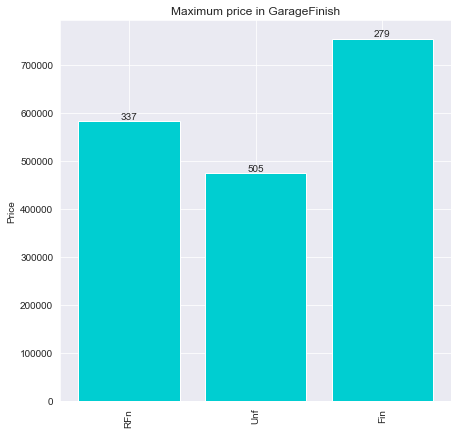

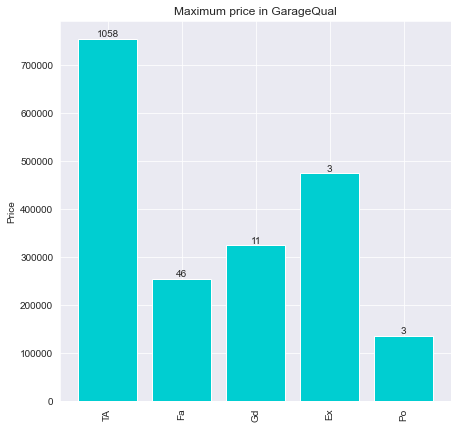

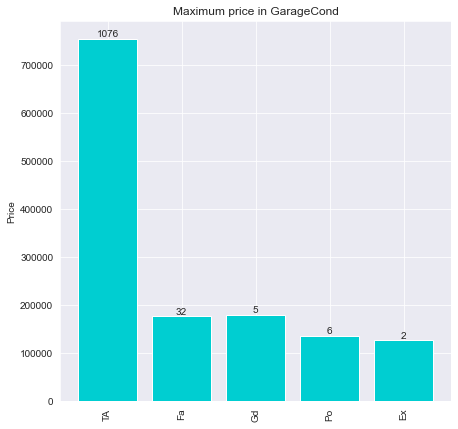

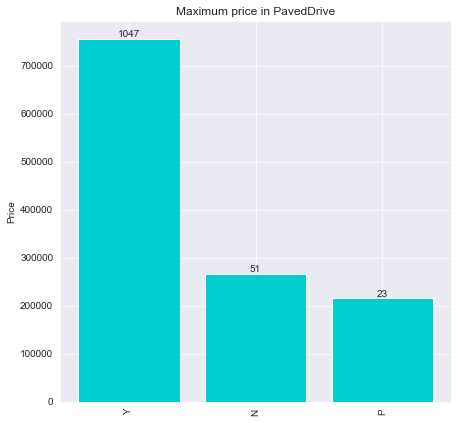

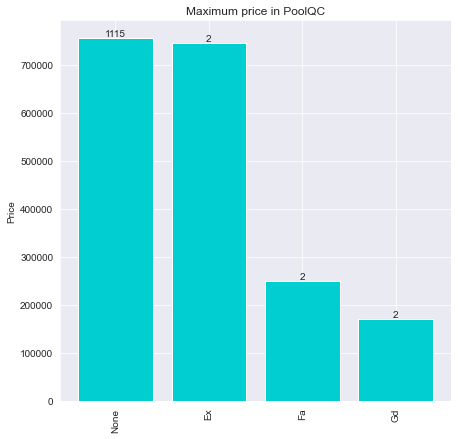

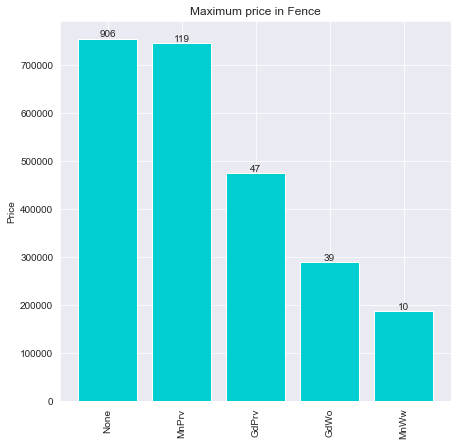

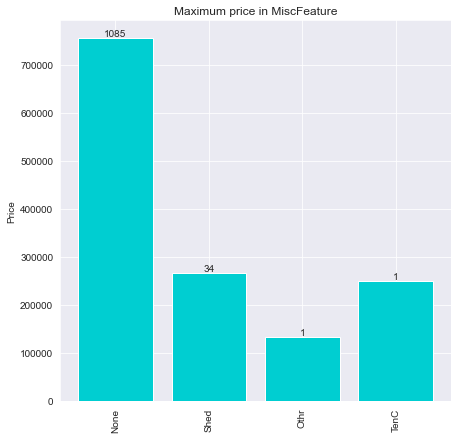

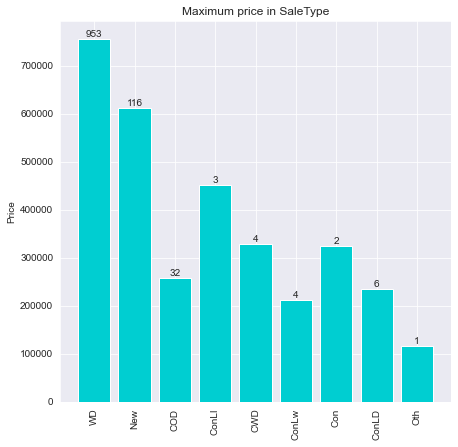

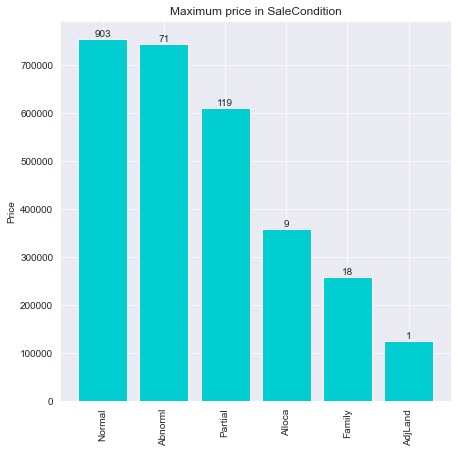

In [12]:
categorical_columns =  filledDf.select_dtypes(include=["object"])                           
# # categorical_columns = [filledDf.SaleCondition
for column in categorical_columns.columns:
    max_prices = []
    no_of_samples_in_category = []
    for category in filledDf[column].unique():
        max_prices.append(pd.Series.max(filledDf[filledDf[column] == category].SalePrice))
        no_of_samples_in_category.append(len(filledDf[filledDf[column] == category].SalePrice))

    plt.figure(figsize=(7,7)) 
    plt.xticks(rotation='vertical')
    bar_chart = plt.bar(filledDf[column].unique(), max_prices, color="darkturquoise")
    d = plt.bar_label(bar_chart, no_of_samples_in_category)
    title = plt.title(f"Maximum price in {column}")
    plt.ylabel("Price")

# Plotting relation between non categorical x and y

/tmp/ipykernel_136631/1353278631.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7,7))


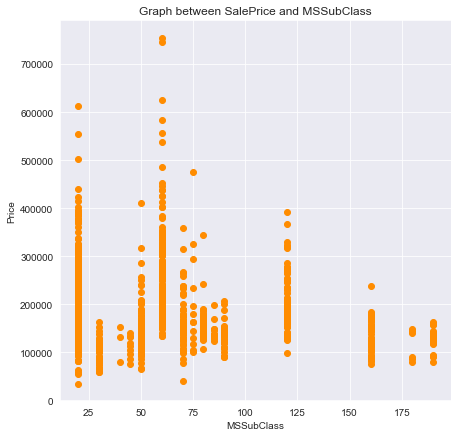

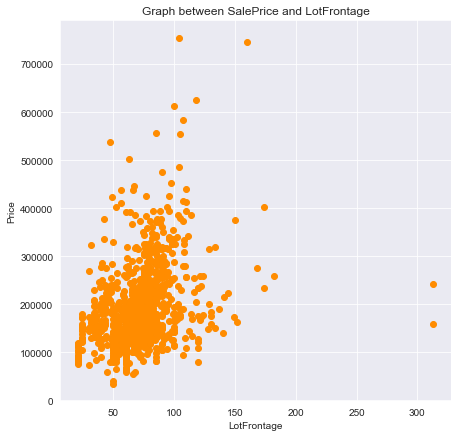

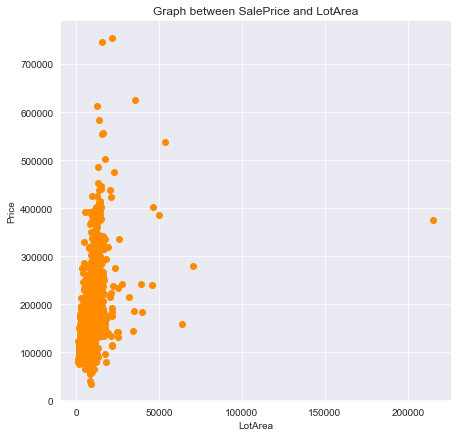

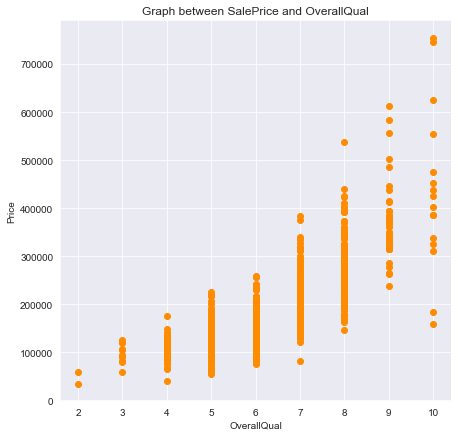

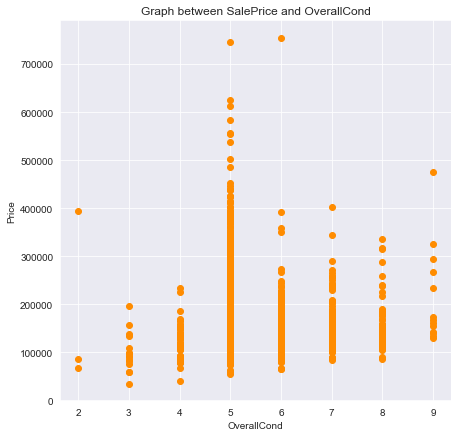

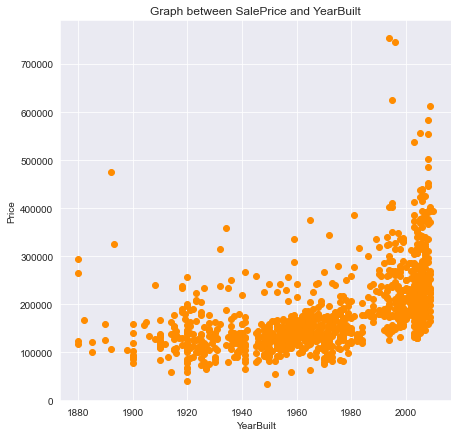

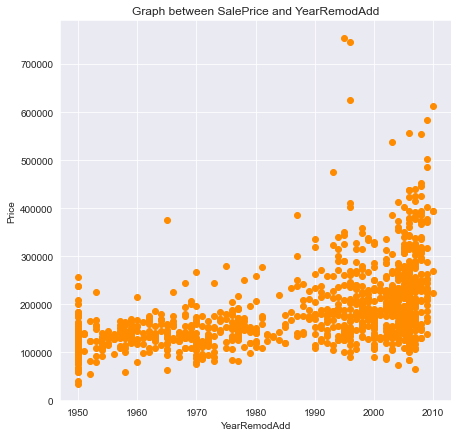

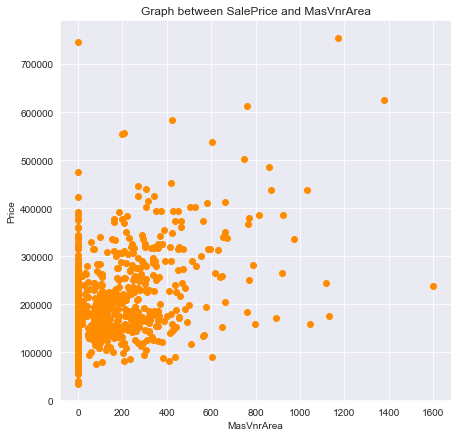

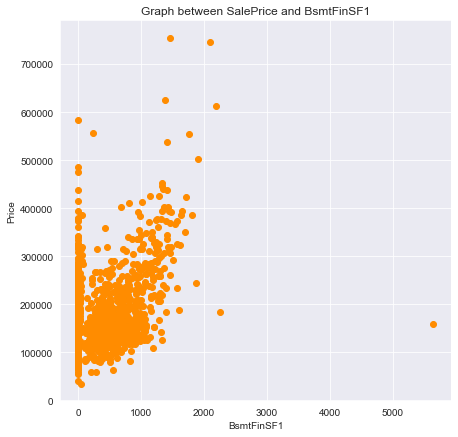

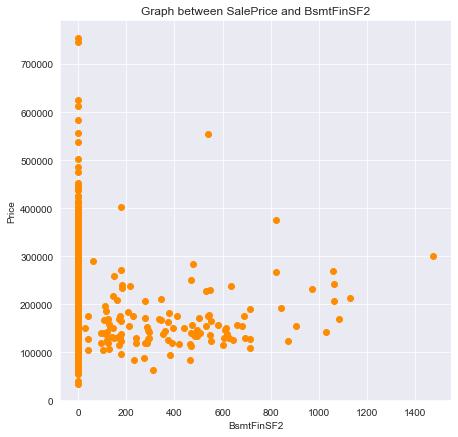

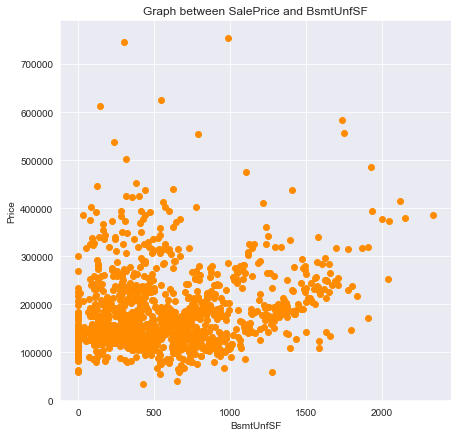

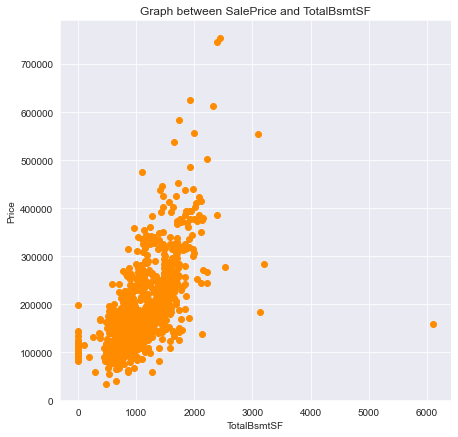

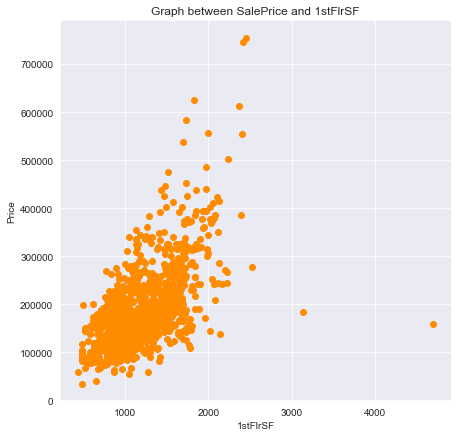

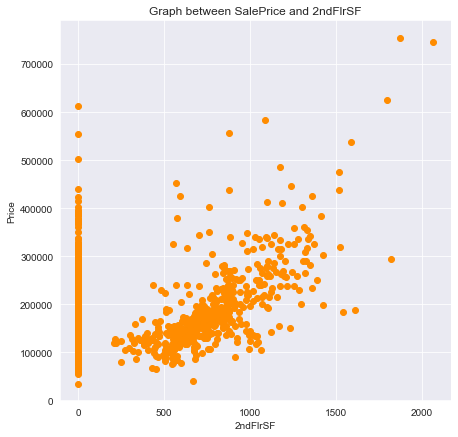

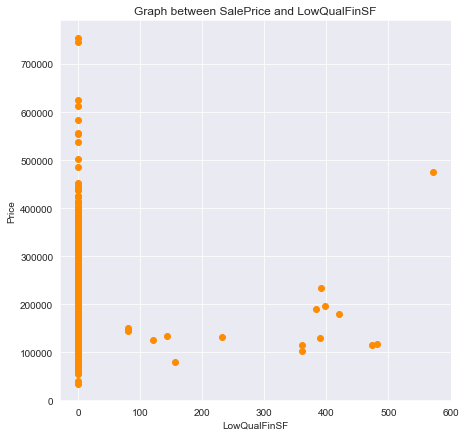

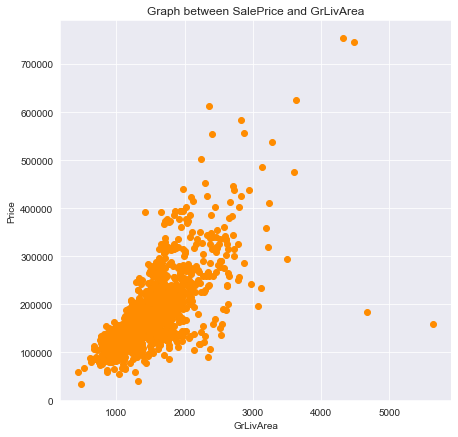

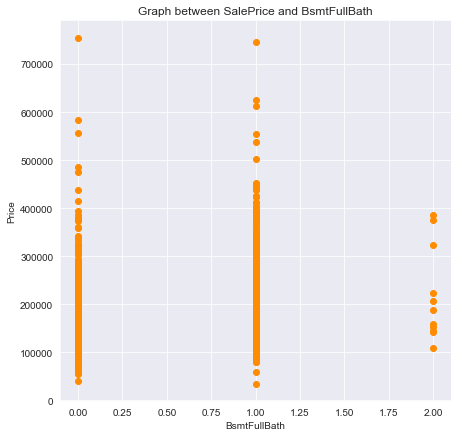

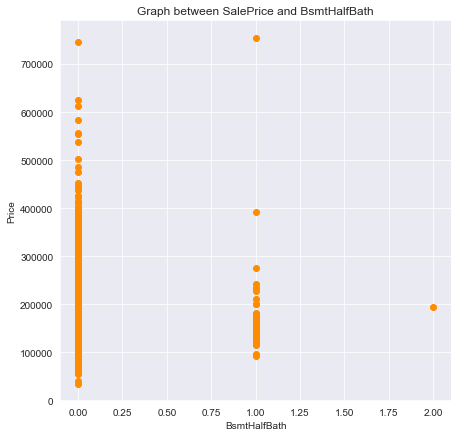

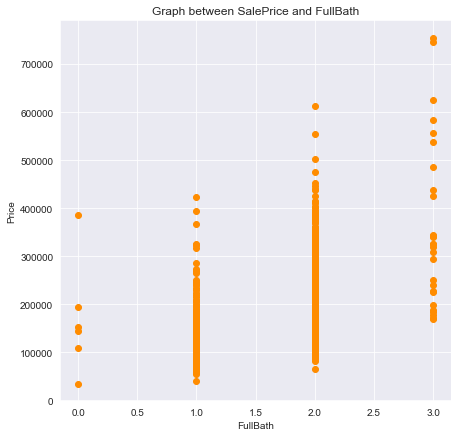

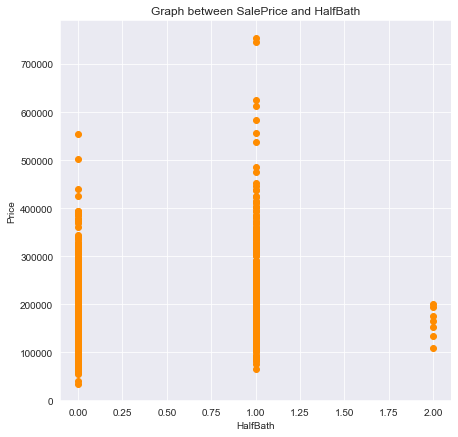

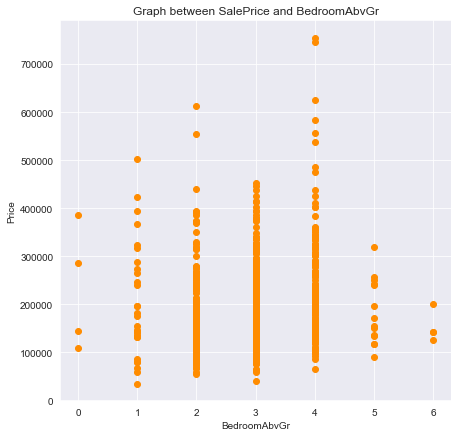

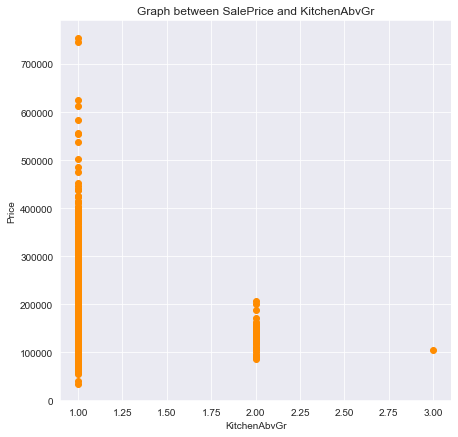

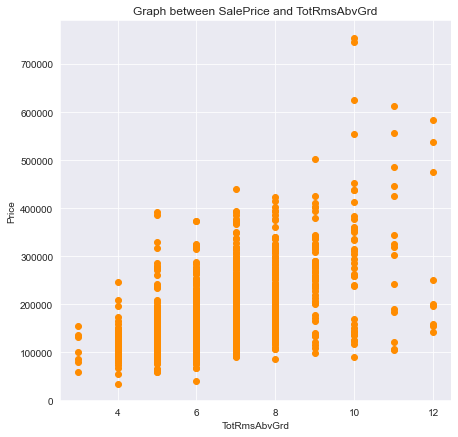

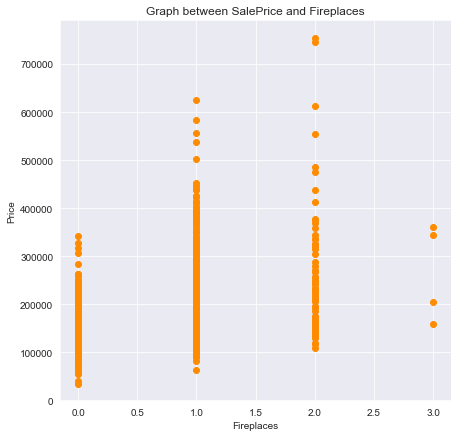

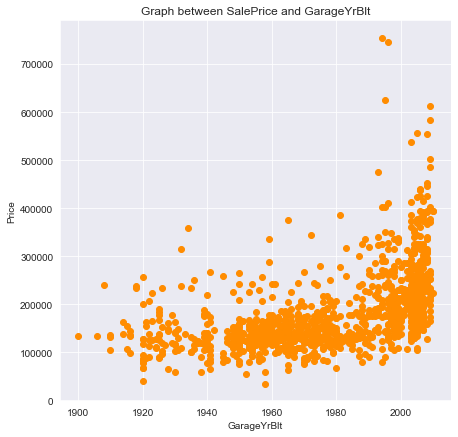

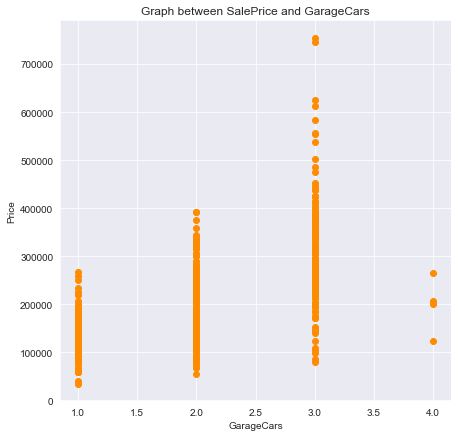

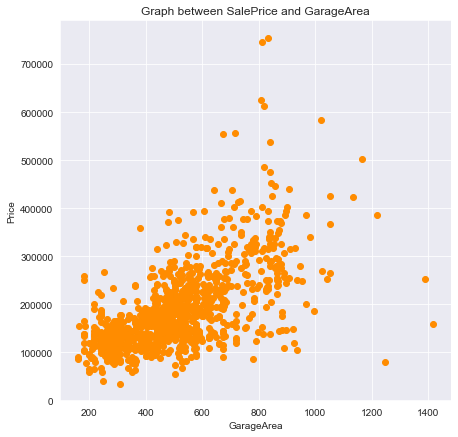

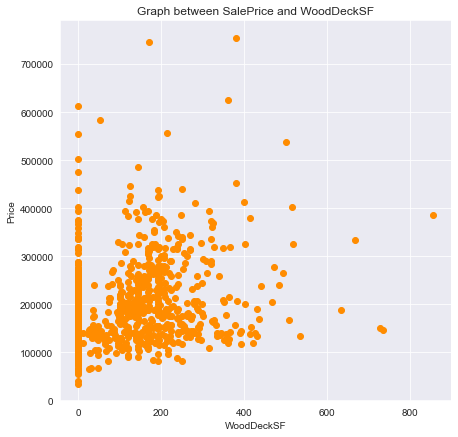

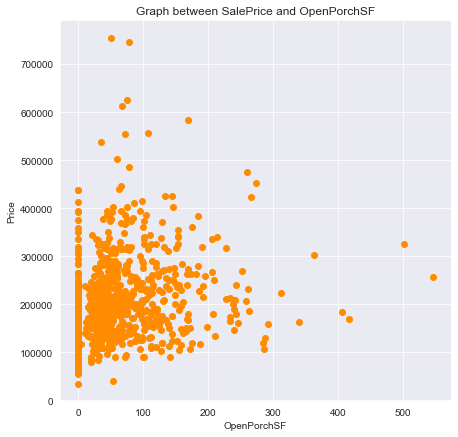

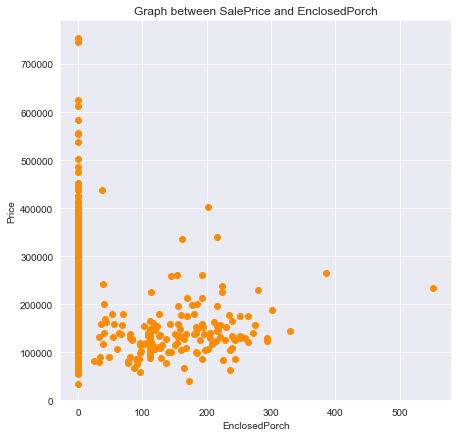

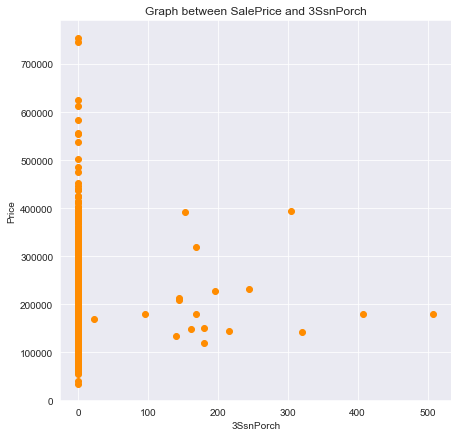

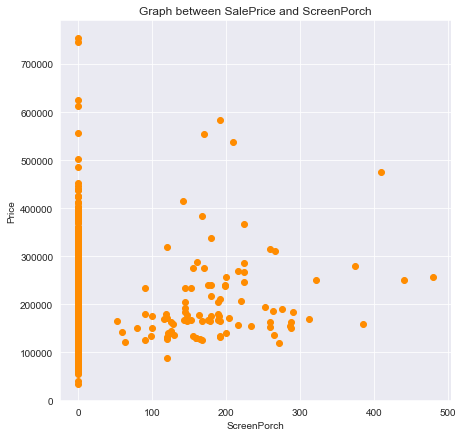

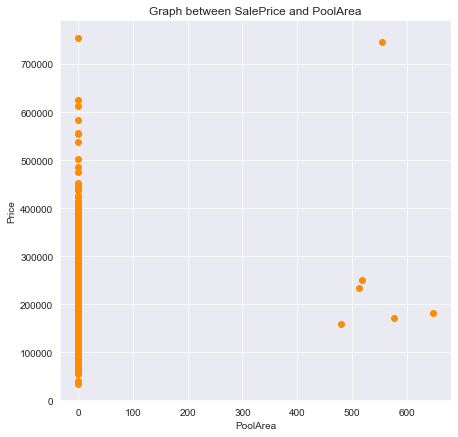

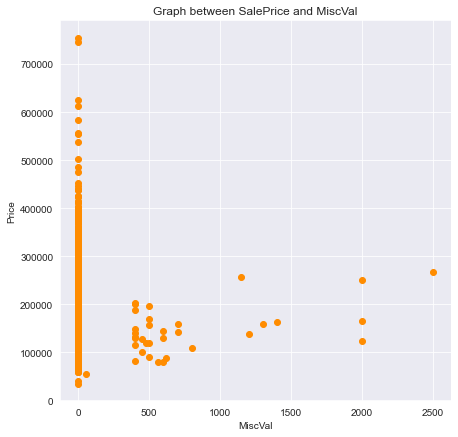

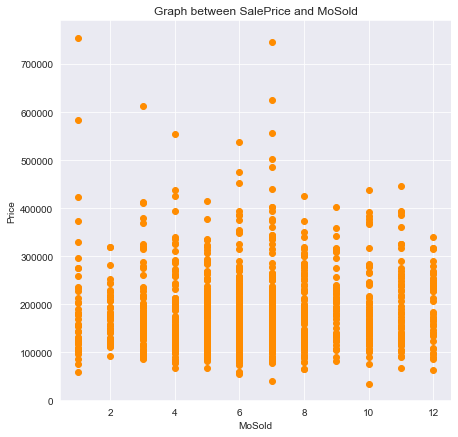

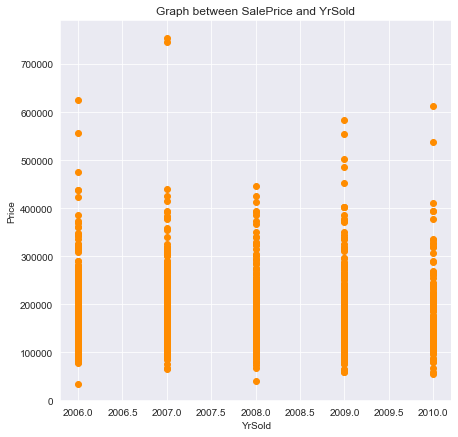

In [13]:
non_categorical_columns = filledDf.select_dtypes(exclude=["object"]).drop(labels=["SalePrice"], axis="columns")
    
for column in non_categorical_columns.columns:
    # print(column)
    plt.figure(figsize=(7,7))
    plt.scatter(filledDf[column], filledDf.SalePrice, color="darkorange")
    title = plt.title(f"Graph between SalePrice and {column}")
    plt.ylabel("Price")
    plt.xlabel(column)

### We have only one sample of NoSeWa utility which has NaN on Lot Frontage

In [14]:
df.Utilities.unique(), filledDf.Utilities.unique()

(array(['AllPub', 'NoSeWa'], dtype=object), array(['AllPub'], dtype=object))

In [15]:
df.loc[lambda x: x.Utilities == "NoSeWa"]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
944,945,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,Norm,Norm,1Fam,SLvl,6,6,1958,1958,Gable,CompShg,HdBoard,HdBoard,BrkFace,541.0,TA,TA,CBlock,TA,TA,No,GLQ,111,Rec,354,354,819,GasA,Gd,Y,FuseA,1344,0,0,1344,0,1,1,0,3,1,Gd,7,Typ,1,Gd,Basment,1958.0,RFn,2,525,TA,TA,Y,0,118,0,0,233,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500


In [16]:
df.YearBuilt.unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905])

## All categories seems to have ordinal (high, medium, low) effect on price

In [17]:
encoder = LabelEncoder()

In [18]:
encoded_cat_df = categorical_columns.apply(encoder.fit_transform)
encoded_cat_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [19]:
normalized_columns = filledDf.drop(labels=list(encoded_cat_df.columns)+["OverallQual", "OverallCond"], axis="columns")
normalized_columns.head()


,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


## Replacing the original categories with encoded ones and normalizing integral values

In [20]:
scaler = MinMaxScaler(feature_range=(0,10))

final_df = filledDf.drop(labels=list(encoded_cat_df.columns) + ["SalePrice"], axis="columns")
filledDf.SalePrice = np.log(filledDf.SalePrice)
final_df[list(final_df.columns)] =  scaler.fit_transform(final_df)
# final_df[list(final_df.columns)] =  final_df


final_df = pd.concat([final_df, filledDf.SalePrice, encoded_cat_df], axis="columns")
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,2.352941,1.506849,0.334198,6.25,4.285714,9.461538,8.833333,1.2250,1.250886,0.0,0.642123,1.400982,0.982605,4.135593,0.0,2.444274,5.0,0.0,6.666667,5.0,5.000000,0.0,5.555556,0.000000,9.363636,3.333333,3.084261,0.000000,1.115174,0.000000,0.0,0.0,0.0,0.0,0.909091,5.0,12.247694,3,1,1,3,3,0,4,0,5,2,2,0,5,1,1,11,13,1,2,3,2,2,4,3,2,6,0,0,1,5,2,5,3,1,1,4,4,2,3,4,0,8,4
1,0.000000,2.020548,0.387950,5.00,8.571429,7.384615,4.333333,0.0000,1.732814,0.0,1.215753,2.065466,1.937000,0.000000,0.0,1.583397,0.0,5.0,6.666667,0.0,5.000000,0.0,3.333333,3.333333,6.909091,3.333333,2.384738,3.477246,0.000000,0.000000,0.0,0.0,0.0,0.0,3.636364,2.5,12.109011,3,1,1,3,3,0,2,0,24,1,2,0,2,1,1,7,8,2,3,3,1,2,4,1,0,6,0,0,1,5,3,5,5,1,1,4,4,2,3,4,0,8,4
2,2.352941,1.609589,0.465073,6.25,4.285714,9.307692,8.666667,1.0125,0.861091,0.0,1.857877,1.505728,1.133051,4.193705,0.0,2.590315,5.0,0.0,6.666667,5.0,5.000000,0.0,3.333333,3.333333,9.181818,3.333333,3.561208,0.000000,0.767824,0.000000,0.0,0.0,0.0,0.0,7.272727,5.0,12.317167,3,1,1,0,3,0,4,0,5,2,2,0,5,1,1,11,13,1,2,3,2,2,4,2,2,6,0,0,1,5,2,5,5,1,1,4,4,2,3,4,0,8,4
3,2.941176,1.335616,0.385613,6.25,4.285714,2.692308,3.333333,0.0000,0.382707,0.0,2.311644,1.237316,1.229431,3.661017,0.0,2.457725,5.0,0.0,3.333333,0.0,5.000000,0.0,4.444444,3.333333,8.909091,6.666667,3.831479,0.000000,0.639854,4.927536,0.0,0.0,0.0,0.0,0.909091,0.0,11.849398,3,1,1,0,3,0,0,0,6,2,2,0,5,1,1,12,15,2,3,3,0,4,1,3,0,6,0,2,1,5,2,5,2,5,2,4,4,2,3,4,0,8,0
4,2.352941,2.157534,0.605763,7.50,4.285714,9.230769,8.333333,2.1875,1.160524,0.0,2.097603,1.873977,1.661965,5.099274,0.0,3.382014,5.0,0.0,6.666667,5.0,6.666667,0.0,6.666667,3.333333,9.090909,6.666667,5.373609,2.240373,1.535649,0.000000,0.0,0.0,0.0,0.0,10.000000,5.0,12.429216,3,1,1,0,3,0,2,0,15,2,2,0,5,1,1,11,13,1,2,3,2,2,4,0,2,6,0,0,1,5,2,5,5,1,1,4,4,2,3,4,0,8,4


In [21]:
encoded_cat_df.columns.intersection(final_df.columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [22]:
final_df.SalePrice

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1121, dtype: float64

In [23]:
final_df.select_dtypes(exclude=["int64","float64"]).dtypes

Series([], dtype: object)

In [24]:
final_df.max()

MSSubClass       10.0
LotFrontage      10.0
LotArea          10.0
OverallQual      10.0
OverallCond      10.0
                 ... 
PoolQC            3.0
Fence             4.0
MiscFeature       3.0
SaleType          8.0
SaleCondition     5.0
Length: 80, dtype: float64

In [25]:
df.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [26]:
final_df.GarageYrBlt.unique()

array([ 9.36363636,  6.90909091,  9.18181818,  8.90909091,  9.09090909,
        8.45454545,  9.45454545,  2.81818182,  3.54545455,  5.90909091,
        9.54545455,  9.63636364,  8.27272727,  6.09090909,  5.27272727,
        2.72727273,  9.27272727,  9.72727273,  9.81818182,  5.18181818,
        1.81818182,  5.36363636,  8.63636364,  4.90909091,  4.81818182,
        6.        ,  7.72727273,  5.72727273,  7.36363636,  5.63636364,
        5.81818182,  9.        ,  6.63636364,  3.18181818,  8.18181818,
        4.09090909,  7.90909091,  8.09090909,  1.36363636,  4.36363636,
        6.18181818,  6.72727273,  9.90909091,  4.54545455,  5.54545455,
        1.90909091,  0.        ,  8.81818182,  7.18181818,  7.        ,
        6.36363636,  6.81818182,  2.09090909,  2.36363636,  5.45454545,
        7.81818182,  8.        ,  1.45454545,  2.90909091,  1.63636364,
        7.27272727,  2.18181818,  8.72727273,  3.63636364,  6.54545455,
        6.45454545,  4.45454545,  0.90909091,  5.09090909,  7.09

In [27]:
set(final_df.columns) == set(df.columns) # Final check if all columns are present

False

## Function for preparing data -> encode categories, normalize non-categorical data

In [28]:
def prepareData(data): #expects pd.Dataframe
    
    # Preprocessors
    encoder = LabelEncoder()
    minmax = MinMaxScaler(feature_range=(0,10))
    
    #handle categorical columns
    categorical_columns = data.select_dtypes(include=["object"])
    #Fill categorical values with "None" 
    categorical_columns = categorical_columns.apply(encoder.fit_transform)
    
    #handle normalized columns
    normalized_columns = data.drop(labels=list(categorical_columns.columns), axis="columns")
    normalized_columns = normalized_columns.dropna()
    normalized_columns_without_id = normalized_columns.drop(["Id"], axis=1)
    normalized_columns_without_id[list(normalized_columns_without_id.columns)] = minmax.fit_transform(normalized_columns_without_id)

    normalized_columns = normalized_columns[["Id"]]
    normalized_columns = pd.concat([normalized_columns, normalized_columns_without_id], axis="columns")
    
    # final result
    finals_df = pd.concat([normalized_columns, categorical_columns], axis="columns")
    
    # Removing any nan values which were not handled by categorical column
    finals_df.dropna(inplace=True)
    
    return finals_df

test_data = prepareData(pd.read_csv("./test.csv"))
test_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1461.0,0.000000,3.296089,2.007922,4.444444,6.25,6.259542,1.833333,0.000000,1.167082,1.03374,1.261682,1.731109,1.043089,0.000000,0.0,1.043089,0.0,0.0,2.5,0.0,3.333333,0.0,1.666667,0.0,5.739130,0.0,4.538905,1.609195,0.000000,0.0,0.0,2.083333,0.0,0.000000,4.545455,10.0,2,1,2,3,3,0,4,0,12,1,2,0,2,1,0,10,12,2,3,4,1,3,3,3,4,3,0,4,1,3,3,6,5,1,2,3,4,2,2,2,3,8,4
1,1462.0,0.000000,3.351955,2.531788,5.555556,6.25,6.030534,1.333333,0.837209,2.301746,0.00000,1.897196,2.608440,1.966724,0.000000,0.0,1.966724,0.0,0.0,2.5,5.0,5.000000,0.0,2.500000,0.0,5.478261,0.0,1.527378,4.517241,0.631579,0.0,0.0,0.000000,0.0,7.352941,4.545455,10.0,3,1,2,0,3,0,0,0,12,2,2,0,2,3,0,11,13,1,3,4,1,3,3,3,0,5,0,4,1,3,2,6,5,1,2,3,4,2,2,4,0,8,4
2,1463.0,2.352941,2.960894,2.445237,4.444444,5.00,9.007634,8.000000,0.000000,1.972569,0.00000,0.640187,1.821394,1.111348,3.764769,0.0,2.606655,0.0,0.0,5.0,5.0,5.000000,0.0,2.500000,2.5,8.869565,2.5,2.752161,2.436782,0.596491,0.0,0.0,0.000000,0.0,0.000000,1.818182,10.0,3,1,2,0,3,0,4,0,8,2,2,0,4,1,0,10,12,2,3,4,2,2,3,3,2,5,0,2,1,3,3,6,4,1,0,3,4,2,2,2,3,8,4
3,1464.0,2.352941,3.184358,1.682313,5.555556,6.25,9.083969,8.000000,0.155039,1.501247,0.00000,1.514019,1.817468,1.107082,3.641246,0.0,2.553328,0.0,0.0,5.0,5.0,5.000000,0.0,3.333333,2.5,8.956522,2.5,2.665706,4.137931,0.631579,0.0,0.0,0.000000,0.0,0.000000,4.545455,10.0,3,1,2,0,3,0,4,0,8,2,2,0,4,1,0,10,12,1,3,4,2,3,3,3,2,5,0,0,1,3,2,6,2,1,0,3,4,2,2,4,3,8,4
4,1465.0,5.882353,1.229050,0.697366,7.777778,5.00,8.625954,7.000000,0.000000,0.655860,0.00000,4.752336,2.512267,1.862201,0.000000,0.0,1.862201,0.0,0.0,5.0,0.0,3.333333,0.0,1.666667,0.0,8.434783,2.5,2.925072,0.000000,1.438596,0.0,0.0,2.500000,0.0,0.000000,0.000000,10.0,3,1,2,0,1,0,4,0,22,2,2,4,2,1,0,6,6,2,2,4,2,2,3,3,0,5,0,0,1,3,2,6,5,1,1,3,4,2,2,4,3,8,4


In [29]:
test_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'MSZoning', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrica

In [30]:
test_data.isna().sum().loc[lambda x: x>0].sort_values(ascending=False)

Series([], dtype: int64)

## Creating X and Y for Kfold

In [31]:
X = final_df.drop(labels="SalePrice", axis="columns")
Y = final_df.SalePrice

## Model Functions

In [32]:
from keras import backend as K
def soft_acc(y_true, y_pred):
    return K.mean(K.equal(K.round(y_true), K.round(y_pred)))

def build_model():
    model = keras.models.Sequential([
        keras.layers.Dense(80, input_shape=(79,), activation="relu"),
        keras.layers.Dense(50, activation="relu"),
        keras.layers.Dense(10, activation="relu"),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer="adam", loss="mean_absolute_error", metrics=[soft_acc])
    return model, [896 // 20, 40]

def build_model2():
    model = keras.models.Sequential([
        keras.layers.Dense(100, input_shape=(79,), activation="relu"),
        keras.layers.Dense(10, activation="relu"),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer="adam", loss="mean_absolute_error", metrics=[soft_acc])
    return model, [896 // 20, 40]



def build_model3():
    model = keras.models.Sequential([
        keras.layers.Dense(1, input_shape=(79,))
    ])
    model.compile(optimizer="adam", loss="mean_absolute_error", metrics=[soft_acc])
    return model, [896 // 20, 40]

def build_model4():
    model = keras.models.Sequential([
        keras.layers.Dense(100, input_shape=(79,)),
        keras.layers.Dense(10),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer="adam", loss="mean_absolute_error", metrics=[soft_acc])
    return model, [896 // 20, 40]

def build_model5():
    model = keras.models.Sequential([
        keras.layers.Dense(200, input_shape=(79,)),
        keras.layers.Dense(100),
        keras.layers.Dense(50),
        keras.layers.Dense(10),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer="adam", loss="mean_absolute_error", metrics=[soft_acc])
    return model, [896 // 20, 40]

def build_model6():
    model = keras.models.Sequential([
        keras.layers.Dense(200, input_shape=(79,), activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(50, activation="relu"),
        keras.layers.Dense(10, activation="relu"),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer="adam", loss="mean_absolute_error", metrics=[soft_acc])
    return model, [896 // 20, 40]

## K-fold

In [33]:
folds = KFold(n_splits=10)

In [34]:
def run_kfold(foldClass, build_model_fns):
    result = []
    for build_model_fn in build_model_fns:
        histories = []
        models = []
        for train_idx, test_idx in folds.split(X, Y):
            # print(train_idx, test_idx)
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test  = Y.iloc[train_idx], Y.iloc[test_idx] 
            fn = build_model_fn()
            model = fn[0]
            history = model.fit(X_train, y_train, batch_size=fn[1][0], epochs=fn[1][1], verbose=False, validation_data=(X_test, y_test) )
            histories.append(history)
            models.append(model)
        result.append({"hist": histories, "models": models})
        print(f" Model {build_model_fns.index(build_model_fn)}'s average loss: {np.average([x.history['loss'] for x in histories])}")
    return result

In [35]:
models = run_kfold(foldClass=folds, build_model_fns=[build_model6, build_model5, build_model4, build_model, build_model2, build_model3])

2021-10-21 13:49:26.300332: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-21 13:49:26.300394: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-21 13:49:26.300427: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu-OptiPlex-9010): /proc/driver/nvidia/version does not exist
2021-10-21 13:49:26.438668: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


 Model 0's average loss: 0.33370175590738654
 Model 1's average loss: 0.48028390273451804
 Model 2's average loss: 0.5238812054693699
 Model 3's average loss: 0.4009946085885167
 Model 4's average loss: 0.42530630629509686
 Model 5's average loss: 1.4067128143459557


## Graph Util Functions

In [36]:
def showGraphs(history):
    x = plt.figure(figsize=(10,7))
    model_history = history.history
    loss_values = model_history["loss"]
    validation_loss_values = model_history["val_loss"]
    epochs = range(1, len(loss_values) + 1)

    plt.scatter(epochs, loss_values,  label="Training Loss", color="darkorange")
    plt.plot(epochs, validation_loss_values, "mediumaquamarine", label="Validation loss")
    plt.title(f"Validation and Training loss {np.round(np.average(loss_values), 4)}, {np.round(np.average(validation_loss_values), 4)}", fontsize=22)
    plt.xlabel("Epochs", fontsize=18)
    plt.ylabel("Loss", fontsize=18)
    plt.legend()
    plt.show()

    plt.clf()

def plot_avg_losses(histories,  title="Average Loss of model"):
    avg_losses = []
    plt.figure()
    for i,history in enumerate(histories):
        avg_losses.append(np.round(np.average(history.history["loss"]), 4))
        plt.text(range(len(avg_losses))[i], avg_losses[i], avg_losses[i])
    plt.title(title, fontsize=22)
    plt.xlabel("Folds")
    plt.ylabel("Avg Loss")
    plt.plot(range(len(avg_losses)), avg_losses)

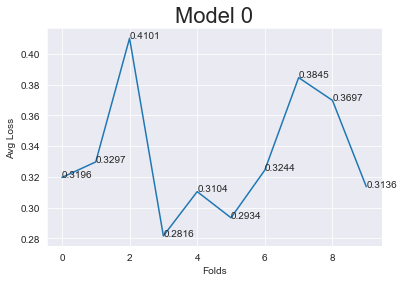

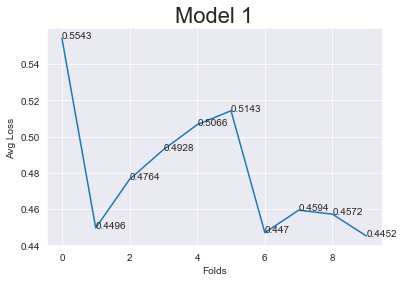

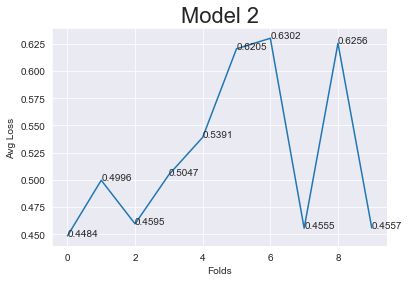

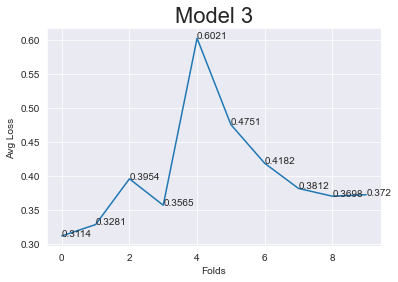

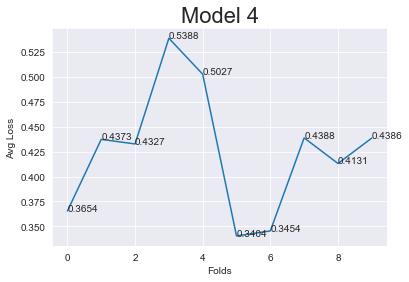

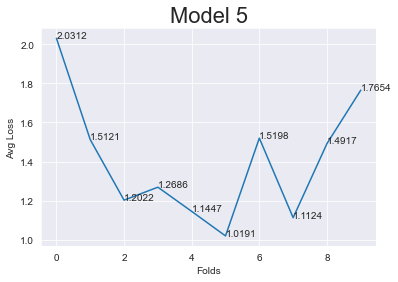

In [37]:
for i, model in enumerate(models):
    plot_avg_losses(model["hist"], f"Model {i}")


# Model 0 (build_model_6) has the lowest loss Among All

## Train Test Split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)

x_val = x_train[:100]
y_val = y_train[:100]

x_train = x_train[100:]
y_train = y_train[100:]

## Training Model 0 (build_model_6)

In [39]:
model = build_model6()[0] # We will adjust the batch size and epochs here, don't need second arg

history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
25/25 [==============================] - 1s 8ms/step - loss: 5.4960 - soft_acc: 0.0796 - val_loss: 1.4376 - val_soft_acc: 0.2500
Epoch 2/30
25/25 [==============================] - 0s 2ms/step - loss: 0.9095 - soft_acc: 0.3541 - val_loss: 0.6594 - val_soft_acc: 0.4062
Epoch 3/30
25/25 [==============================] - 0s 2ms/step - loss: 0.4995 - soft_acc: 0.5596 - val_loss: 0.4422 - val_soft_acc: 0.6016
Epoch 4/30
25/25 [==============================] - 0s 3ms/step - loss: 0.3972 - soft_acc: 0.6246 - val_loss: 0.5221 - val_soft_acc: 0.4531
Epoch 5/30
25/25 [==============================] - 0s 2ms/step - loss: 0.3829 - soft_acc: 0.6268 - val_loss: 0.3696 - val_soft_acc: 0.6719
Epoch 6/30
25/25 [==============================] - 0s 2ms/step - loss: 0.3392 - soft_acc: 0.6777 - val_loss: 0.3595 - val_soft_acc: 0.7188
Epoch 7/30
25/25 [==============================] - 0s 2ms/step - loss: 0.3369 - soft_acc: 0.6900 - val_loss: 0.4158 - val_soft_acc: 0.5625
Epoch 8/30
25/25 [==

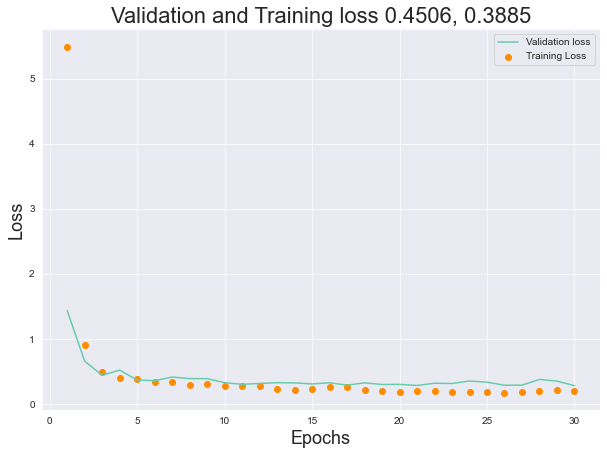

<Figure size 432x288 with 0 Axes>

In [40]:
showGraphs(history)

In [41]:
filledDf.SalePrice.max()

13.534473028231162

# Evaluting model with sample submission

In [42]:
test_y = pd.read_csv("./sample_submission.csv")
test_y.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [43]:
combined_test = pd.merge(test_data, test_y, on="Id")
combined_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,1461.0,0.000000,3.296089,2.007922,4.444444,6.25,6.259542,1.833333,0.000000,1.167082,1.03374,1.261682,1.731109,1.043089,0.000000,0.0,1.043089,0.0,0.0,2.5,0.0,3.333333,0.0,1.666667,0.0,5.739130,0.0,4.538905,1.609195,0.000000,0.0,0.0,2.083333,0.0,0.000000,4.545455,10.0,2,1,2,3,3,0,4,0,12,1,2,0,2,1,0,10,12,2,3,4,1,3,3,3,4,3,0,4,1,3,3,6,5,1,2,3,4,2,2,2,3,8,4,169277.052498
1,1462.0,0.000000,3.351955,2.531788,5.555556,6.25,6.030534,1.333333,0.837209,2.301746,0.00000,1.897196,2.608440,1.966724,0.000000,0.0,1.966724,0.0,0.0,2.5,5.0,5.000000,0.0,2.500000,0.0,5.478261,0.0,1.527378,4.517241,0.631579,0.0,0.0,0.000000,0.0,7.352941,4.545455,10.0,3,1,2,0,3,0,0,0,12,2,2,0,2,3,0,11,13,1,3,4,1,3,3,3,0,5,0,4,1,3,2,6,5,1,2,3,4,2,2,4,0,8,4,187758.393989
2,1463.0,2.352941,2.960894,2.445237,4.444444,5.00,9.007634,8.000000,0.000000,1.972569,0.00000,0.640187,1.821394,1.111348,3.764769,0.0,2.606655,0.0,0.0,5.0,5.0,5.000000,0.0,2.500000,2.5,8.869565,2.5,2.752161,2.436782,0.596491,0.0,0.0,0.000000,0.0,0.000000,1.818182,10.0,3,1,2,0,3,0,4,0,8,2,2,0,4,1,0,10,12,2,3,4,2,2,3,3,2,5,0,2,1,3,3,6,4,1,0,3,4,2,2,2,3,8,4,183583.683570
3,1464.0,2.352941,3.184358,1.682313,5.555556,6.25,9.083969,8.000000,0.155039,1.501247,0.00000,1.514019,1.817468,1.107082,3.641246,0.0,2.553328,0.0,0.0,5.0,5.0,5.000000,0.0,3.333333,2.5,8.956522,2.5,2.665706,4.137931,0.631579,0.0,0.0,0.000000,0.0,0.000000,4.545455,10.0,3,1,2,0,3,0,4,0,8,2,2,0,4,1,0,10,12,1,3,4,2,3,3,3,2,5,0,0,1,3,2,6,2,1,0,3,4,2,2,4,3,8,4,179317.477511
4,1465.0,5.882353,1.229050,0.697366,7.777778,5.00,8.625954,7.000000,0.000000,0.655860,0.00000,4.752336,2.512267,1.862201,0.000000,0.0,1.862201,0.0,0.0,5.0,0.0,3.333333,0.0,1.666667,0.0,8.434783,2.5,2.925072,0.000000,1.438596,0.0,0.0,2.500000,0.0,0.000000,0.000000,10.0,3,1,2,0,1,0,4,0,22,2,2,4,2,1,0,6,6,2,2,4,2,2,3,3,0,5,0,0,1,3,2,6,5,1,1,3,4,2,2,4,3,8,4,150730.079977


In [44]:
combined_test.SalePrice = np.log(combined_test.SalePrice)

In [45]:
combined_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,1461.0,0.000000,3.296089,2.007922,4.444444,6.25,6.259542,1.833333,0.000000,1.167082,1.03374,1.261682,1.731109,1.043089,0.000000,0.0,1.043089,0.0,0.0,2.5,0.0,3.333333,0.0,1.666667,0.0,5.739130,0.0,4.538905,1.609195,0.000000,0.0,0.0,2.083333,0.0,0.000000,4.545455,10.0,2,1,2,3,3,0,4,0,12,1,2,0,2,1,0,10,12,2,3,4,1,3,3,3,4,3,0,4,1,3,3,6,5,1,2,3,4,2,2,2,3,8,4,12.039292
1,1462.0,0.000000,3.351955,2.531788,5.555556,6.25,6.030534,1.333333,0.837209,2.301746,0.00000,1.897196,2.608440,1.966724,0.000000,0.0,1.966724,0.0,0.0,2.5,5.0,5.000000,0.0,2.500000,0.0,5.478261,0.0,1.527378,4.517241,0.631579,0.0,0.0,0.000000,0.0,7.352941,4.545455,10.0,3,1,2,0,3,0,0,0,12,2,2,0,2,3,0,11,13,1,3,4,1,3,3,3,0,5,0,4,1,3,2,6,5,1,2,3,4,2,2,4,0,8,4,12.142911
2,1463.0,2.352941,2.960894,2.445237,4.444444,5.00,9.007634,8.000000,0.000000,1.972569,0.00000,0.640187,1.821394,1.111348,3.764769,0.0,2.606655,0.0,0.0,5.0,5.0,5.000000,0.0,2.500000,2.5,8.869565,2.5,2.752161,2.436782,0.596491,0.0,0.0,0.000000,0.0,0.000000,1.818182,10.0,3,1,2,0,3,0,4,0,8,2,2,0,4,1,0,10,12,2,3,4,2,2,3,3,2,5,0,2,1,3,3,6,4,1,0,3,4,2,2,2,3,8,4,12.120426
3,1464.0,2.352941,3.184358,1.682313,5.555556,6.25,9.083969,8.000000,0.155039,1.501247,0.00000,1.514019,1.817468,1.107082,3.641246,0.0,2.553328,0.0,0.0,5.0,5.0,5.000000,0.0,3.333333,2.5,8.956522,2.5,2.665706,4.137931,0.631579,0.0,0.0,0.000000,0.0,0.000000,4.545455,10.0,3,1,2,0,3,0,4,0,8,2,2,0,4,1,0,10,12,1,3,4,2,3,3,3,2,5,0,0,1,3,2,6,2,1,0,3,4,2,2,4,3,8,4,12.096913
4,1465.0,5.882353,1.229050,0.697366,7.777778,5.00,8.625954,7.000000,0.000000,0.655860,0.00000,4.752336,2.512267,1.862201,0.000000,0.0,1.862201,0.0,0.0,5.0,0.0,3.333333,0.0,1.666667,0.0,8.434783,2.5,2.925072,0.000000,1.438596,0.0,0.0,2.500000,0.0,0.000000,0.000000,10.0,3,1,2,0,1,0,4,0,22,2,2,4,2,1,0,6,6,2,2,4,2,2,3,3,0,5,0,0,1,3,2,6,5,1,1,3,4,2,2,4,3,8,4,11.923246


In [46]:
combined_test.SalePrice.unique()

array([12.03929202, 12.14291128, 12.12042588, ..., 12.0124198 ,
       12.29784213, 12.14282325])

In [47]:
combined_test.isna().sum().loc[lambda x: x>0].sort_values(ascending=False)

Series([], dtype: int64)

In [48]:
x_final_test = combined_test.drop(["Id", "SalePrice"], axis=1)
y_final_test = combined_test.SalePrice

In [49]:
model.evaluate(x_final_test, y_final_test)
print("______________________________________________________________\n")

36/36 [==============================] - 0s 1ms/step - loss: 0.3737 - soft_acc: 0.7200
______________________________________________________________



## Saving Model

In [50]:
model.save("model.h5")

## Storing Test Predictions

In [51]:
pred = model.predict(x_final_test)
pred, pred.flatten()

(array([[11.735276],
        [11.546418],
        [11.914565],
        ...,
        [11.712603],
        [13.191399],
        [12.365542]], dtype=float32),
 array([11.735276, 11.546418, 11.914565, ..., 11.712603, 13.191399,
        12.365542], dtype=float32))

In [52]:
pred = np.exp(pred.flatten())
pd.Series(pred).unique()

array([124900.94, 103405.99, 149427.27, ..., 122100.85, 535737.  ,
       234577.77], dtype=float32)

In [53]:
data = {"Id": test_data.Id, "SalePrice": pred}
predictions = pd.DataFrame(data=data)
predictions.head()

,Id,SalePrice
0,1461.0,124900.937500
1,1462.0,103405.992188
2,1463.0,149427.265625
3,1464.0,182317.234375
4,1465.0,200501.531250


In [54]:
compare_df = pd.DataFrame({"Id": combined_test.Id, "Original": np.round(np.exp(combined_test.SalePrice), 6), "Predicted": pred})
compare_df.head()

,Id,Original,Predicted
0,1461.0,169277.052498,124900.937500
1,1462.0,187758.393989,103405.992188
2,1463.0,183583.683570,149427.265625
3,1464.0,179317.477511,182317.234375
4,1465.0,150730.079977,200501.531250


In [55]:
compare_df.to_csv("comparision.csv", index=False)

In [56]:
predictions.to_csv("model_pred.csv", index=False)

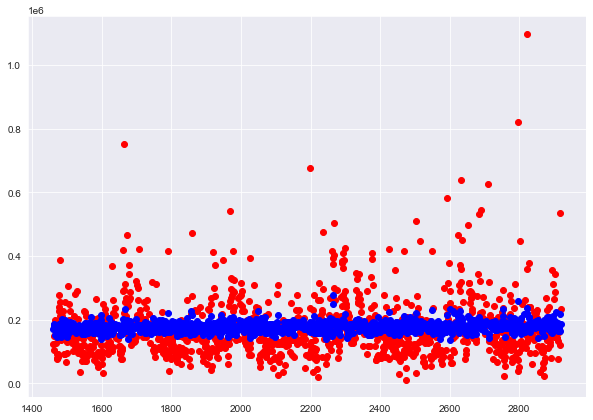

In [57]:
plt.figure(figsize=(10,7))
plt.scatter(predictions.Id, pred, color="red")
plt.scatter(predictions.Id, np.round(np.exp(combined_test.SalePrice), 6) , color="blue")

In [58]:
np.max(np.log(predictions.SalePrice))

13.909248

In [59]:
mean_absolute_error(combined_test.SalePrice , np.log(predictions.SalePrice)), mean_squared_error(combined_test.SalePrice , np.log(predictions.SalePrice))

(0.3737094379283124, 0.24084957134681984)